In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

## Part a

In [3]:
# code here
# first define a function for calculating histogram
# you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''

    #count of color in image and create dict 
    unique, count = np.unique(image, return_counts=True)
    color_count = dict(zip(unique, count))

    #create list of 256 color and set value of count
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = color_count.get(i, 0)

    return (hist)



In [8]:
# code here
# define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
    '''
    don't use libraries
    input(s):
      image (ndarray): input image
    output(s):
      output_image (ndarray): enhanced image with histogram stretching
    '''
    output_image = image.copy()

    # get hist of image
    hist: np.ndarray = calc_hist(output_image)

    # set variable for histogram_stretch
    MAX = 255
    MIN = 0
    img_max = hist.nonzero()[0][-1]
    img_min = hist.nonzero()[0][0]
    img_max_min = img_max - img_min

    # calculate stretch_hist and change image pixel
    for i in hist.nonzero()[0]:
        px_mean = (i - img_min) / img_max_min
        px = px_mean * (MAX - MIN) + MIN
        output_image[output_image == i] = px
    return output_image


In [37]:
# code here
# define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
    '''
    don't use libraries
    input(s):
      image (ndarray): input image
      min_value : min value of the histogram which you wanna clip.
      max_value : max value of the histogram which you wanna clip.
    output(s):
      output_image (ndarray): enhanced image with histogram clipping
    '''
    output_image = image.copy()

    # get hist of image
    hist: np.ndarray = calc_hist(output_image)

    # set variable for histogram_clipping
    MAX = 255
    MIN = 0
    img_color = hist.nonzero()[0]

    # filter image in range  max and min 
    filtered_img_color = img_color[img_color >= min_value]
    filtered_img_color = filtered_img_color[filtered_img_color <= max_value]
    
    # get max and min after filter
    img_max = filtered_img_color[-1]
    img_min = filtered_img_color[0]
    img_max_min = img_max - img_min

    #set max and min for 
    output_image[output_image < min_value] = 0
    output_image[output_image > max_value] = 255
    
    # calculate  and change image pixel for filtered pixel
    for i in filtered_img_color:
        px_mean = (i - img_min) / img_max_min
        px = px_mean * (MAX - MIN) + MIN
        output_image[output_image == i] = px

    return output_image


## Part b

In [38]:
# define "image1" here
image = cv2.imread('./image1.jpg')

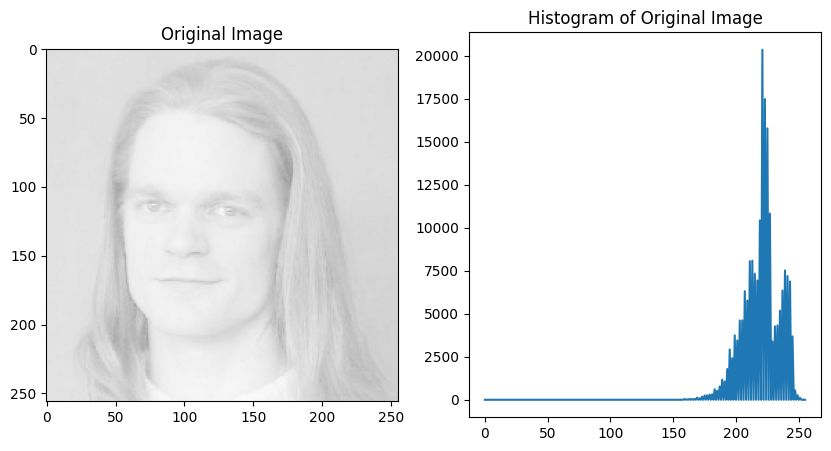

In [56]:
# show the image and its histogram
his = calc_hist(image)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].plot(his)
ax[1].set_title('Histogram of Original Image')
plt.show()

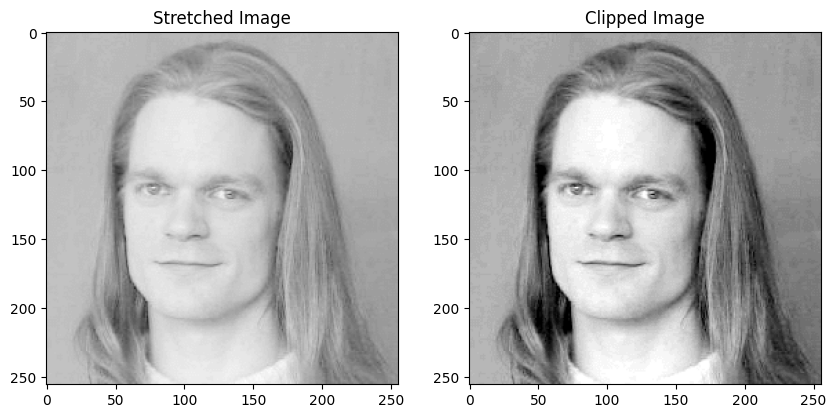

In [58]:
# use clip_hist and stretch_hist function to improve quality of the image and show it
stretched_image = stretch_hist(image)
clipped_image = clip_hist(image, 180, 245)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(stretched_image)
ax[0].set_title('Stretched Image')
ax[1].imshow(clipped_image)
ax[1].set_title('Clipped Image')
plt.show()
